In [1]:
#Importing Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,matthews_corrcoef
import os

In [2]:
url = "https://raw.githubusercontent.com/keshav081991/ML-Classification-Assignment2-streamlit-app/refs/heads/main/bank.csv"

df = pd.read_csv(url, sep=',')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

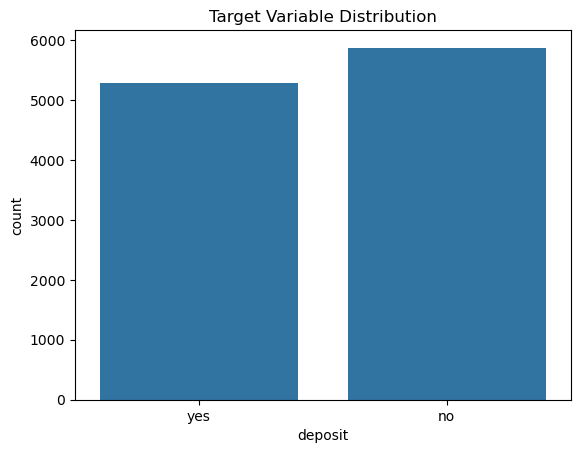

In [8]:
sns.countplot(x=df.deposit, data=df)
plt.title("Target Variable Distribution")
plt.show()

In [9]:
df['deposit'] = df['deposit'].map({'yes':1, 'no':0})

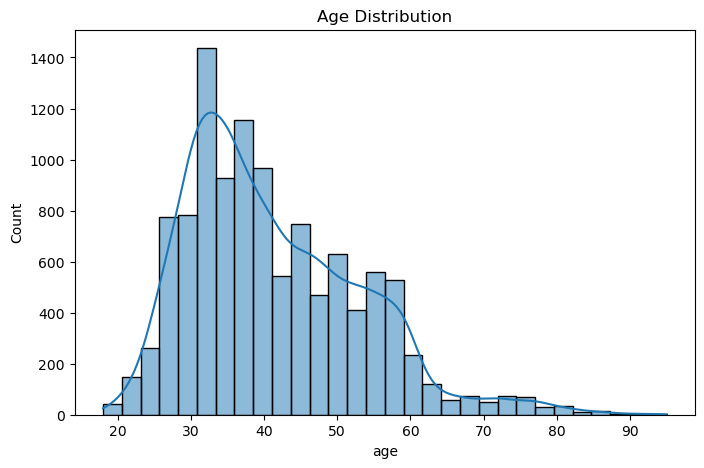

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

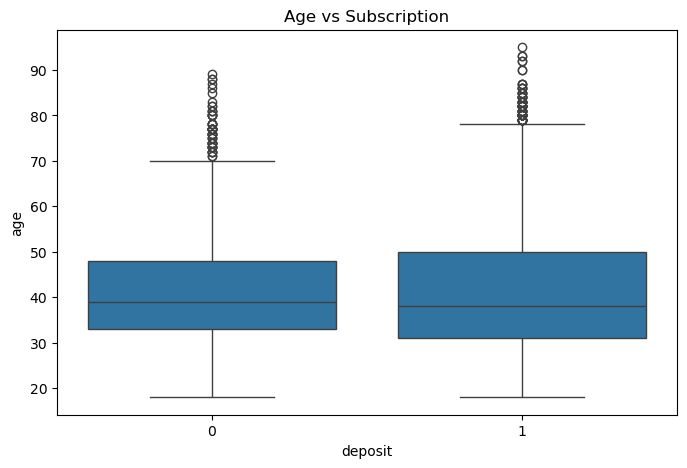

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='deposit', y='age', data=df)
plt.title("Age vs Subscription")
plt.show()

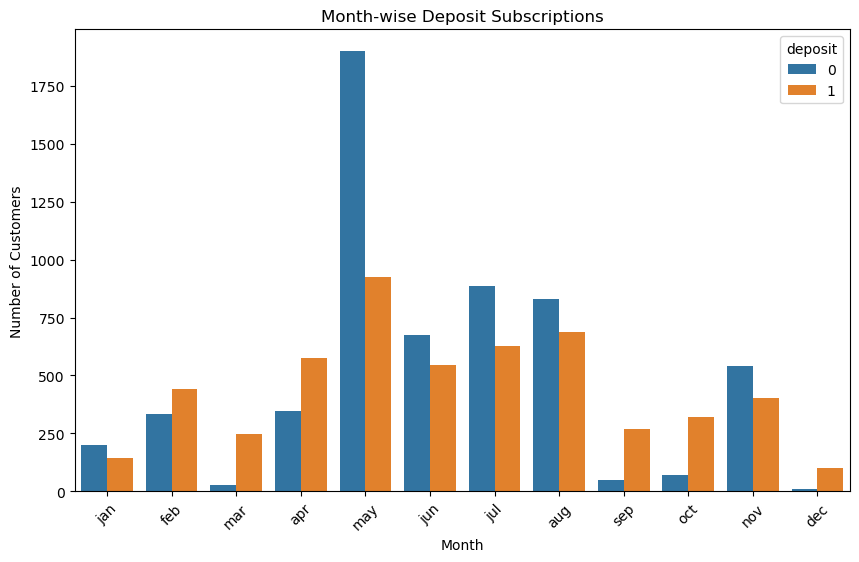

In [12]:
plt.figure(figsize=(10,6))

sns.countplot(x='month', hue='deposit', data=df,
              order=['jan','feb','mar','apr','may','jun',
                     'jul','aug','sep','oct','nov','dec'])

plt.title("Month-wise Deposit Subscriptions")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

plt.show()

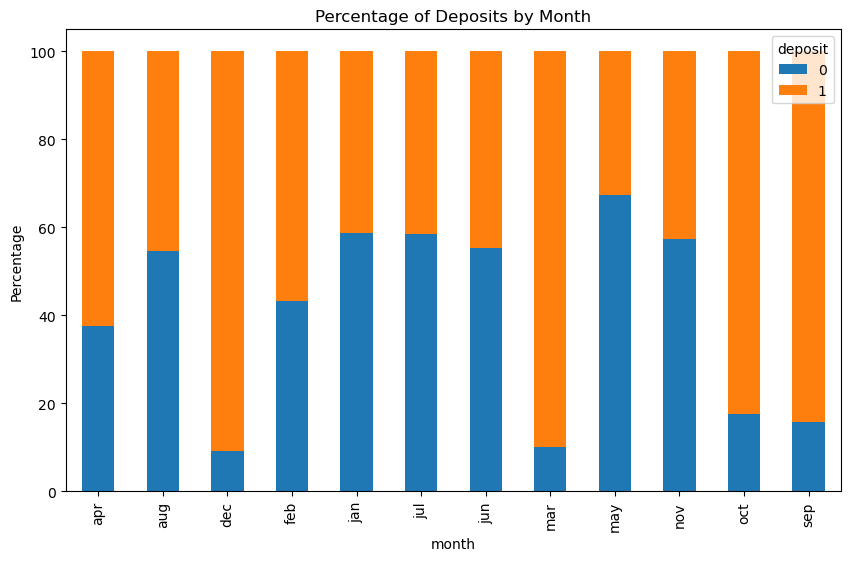

In [13]:
month_deposit = pd.crosstab(df['month'], df['deposit'], normalize='index') * 100
month_deposit.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Percentage of Deposits by Month")
plt.ylabel("Percentage")
plt.show()

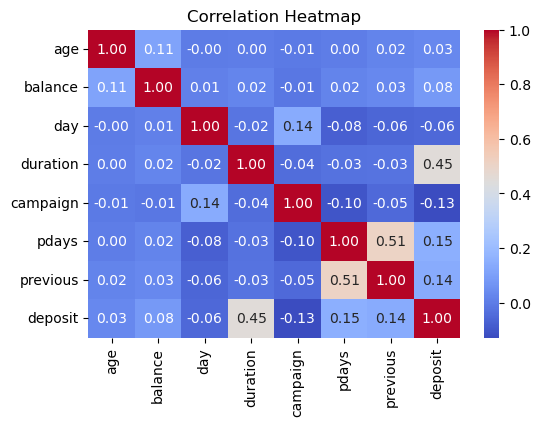

In [14]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), cmap='coolwarm',annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df['balance_log'] = np.log1p(df['balance'])
df['duration_log'] = np.log1p(df['duration'])

C:\Users\kesha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\kesha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[18,30,45,60,100],
    labels=['young','adult','mid_age','senior']
)

In [17]:
df['contact_efficiency'] = df['duration'] / (df['campaign'] + 1)

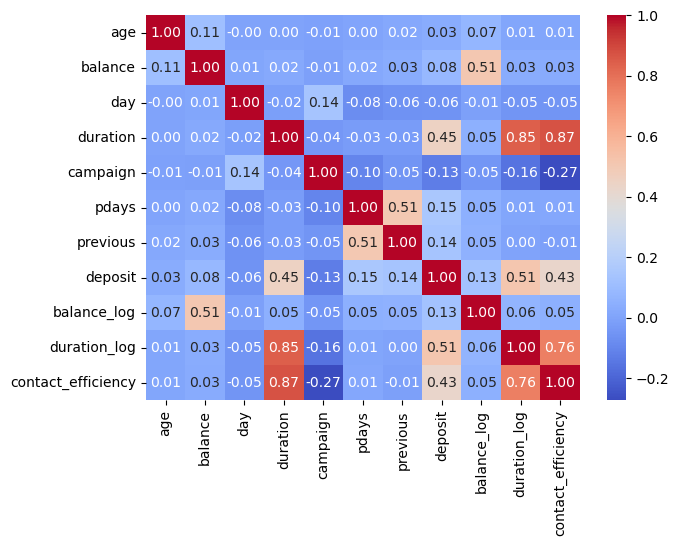

In [18]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(7,5))
sns.heatmap(numeric_df.corr(), cmap='coolwarm',annot=True, fmt=".2f")
plt.show()

In [19]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,balance_log,duration_log,age_group,contact_efficiency
0,59,0,1,1,0,2343,1,0,2,5,...,1042,1,-1,0,3,1,7.759614,6.949856,mid_age,521.000000
1,56,0,1,1,0,45,0,0,2,5,...,1467,1,-1,0,3,1,3.828641,7.291656,mid_age,733.500000
2,41,9,1,1,0,1270,1,0,2,5,...,1389,1,-1,0,3,1,7.147559,7.237059,adult,694.500000
3,55,7,1,1,0,2476,1,0,2,5,...,579,1,-1,0,3,1,7.814803,6.363028,mid_age,289.500000
4,54,0,1,2,0,184,0,0,2,5,...,673,2,-1,0,3,1,5.220356,6.513230,mid_age,224.333333


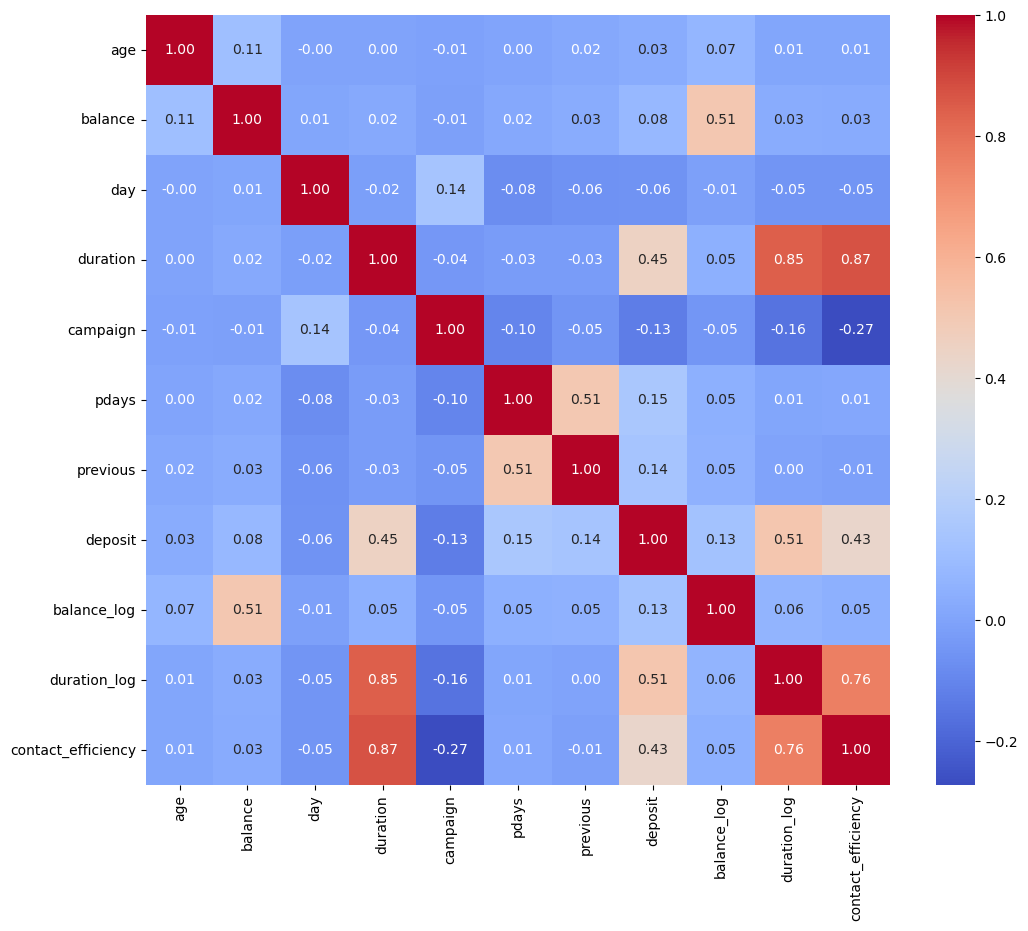

In [21]:
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm',annot=True, fmt=".2f")
plt.show()

In [22]:
df.shape

(11162, 21)

In [23]:
df.month.value_counts()

month
8     2824
1     1519
5     1514
6     1222
9      943
0      923
3      776
10     392
4      344
11     319
7      276
2      110
Name: count, dtype: int64

In [24]:
df['age_group'] = le.fit_transform(df['age_group'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 11162 non-null  int64  
 1   job                 11162 non-null  int32  
 2   marital             11162 non-null  int32  
 3   education           11162 non-null  int32  
 4   default             11162 non-null  int32  
 5   balance             11162 non-null  int64  
 6   housing             11162 non-null  int32  
 7   loan                11162 non-null  int32  
 8   contact             11162 non-null  int32  
 9   day                 11162 non-null  int64  
 10  month               11162 non-null  int32  
 11  duration            11162 non-null  int64  
 12  campaign            11162 non-null  int64  
 13  pdays               11162 non-null  int64  
 14  previous            11162 non-null  int64  
 15  poutcome            11162 non-null  int32  
 16  depo

In [26]:
df = df.drop(['age', 'balance', 'duration'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job                 11162 non-null  int32  
 1   marital             11162 non-null  int32  
 2   education           11162 non-null  int32  
 3   default             11162 non-null  int32  
 4   housing             11162 non-null  int32  
 5   loan                11162 non-null  int32  
 6   contact             11162 non-null  int32  
 7   day                 11162 non-null  int64  
 8   month               11162 non-null  int32  
 9   campaign            11162 non-null  int64  
 10  pdays               11162 non-null  int64  
 11  previous            11162 non-null  int64  
 12  poutcome            11162 non-null  int32  
 13  deposit             11162 non-null  int64  
 14  balance_log         10483 non-null  float64
 15  duration_log        11162 non-null  float64
 16  age_

In [28]:
np.isinf(df).sum()

job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
day                   0
month                 0
campaign              0
pdays                 0
previous              0
poutcome              0
deposit               0
balance_log           9
duration_log          0
age_group             0
contact_efficiency    0
dtype: int64

In [29]:
df['balance_log'] = df['balance_log'].replace([np.inf, -np.inf], np.nan)

In [30]:
df['balance_log'] = df['balance_log'].fillna(
    df['balance_log'].median()
)

In [31]:
X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

results = []
trained_models = {}   # NEW

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model   # store trained model

    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:,1]

    results.append([
        name,
        accuracy_score(y_test, pred),
        roc_auc_score(y_test, prob),
        precision_score(y_test, pred),
        recall_score(y_test, pred),
        f1_score(y_test, pred),
        matthews_corrcoef(y_test, pred)
    ])

results_df = pd.DataFrame(results,
                          columns=["Model","Accuracy","AUC","Precision","Recall","F1","MCC"])

In [34]:
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,AUC,Precision,Recall,F1,MCC
5,XGBoost,0.836095,0.913359,0.815482,0.849110,0.831956,0.672641
4,Random Forest,0.823556,0.904606,0.796476,0.847235,0.821072,0.648573
0,Logistic Regression,0.793103,0.869568,0.782446,0.785380,0.783910,0.585462
2,KNN,0.782803,0.851180,0.779808,0.760075,0.769815,0.564449
1,Decision Tree,0.770712,0.769982,0.763533,0.753515,0.758491,0.540308
3,Naive Bayes,0.770264,0.832118,0.745567,0.788191,0.766287,0.541546


In [35]:
final_model = XGBClassifier(eval_metric='logloss')
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
os.makedirs("data", exist_ok=True)
pd.DataFrame(X_test, columns=X.columns).to_csv("data/X_test.csv", index=False)
pd.DataFrame(y_test).to_csv("data/y_test.csv", index=False)

In [37]:
os.makedirs("models", exist_ok=True)

In [38]:
import pickle


pickle.dump(trained_models["Logistic Regression"], open("models/logistic.pkl","wb"))
pickle.dump(trained_models["Decision Tree"], open("models/dt.pkl","wb"))
pickle.dump(trained_models["KNN"], open("models/knn.pkl","wb"))
pickle.dump(trained_models["Naive Bayes"], open("models/nb.pkl","wb"))
pickle.dump(trained_models["Random Forest"], open("models/rf.pkl","wb"))
pickle.dump(trained_models["XGBoost"], open("models/xgb.pkl","wb"))

pickle.dump(scaler, open("models/scaler.pkl","wb"))
pickle.dump(list(X.columns), open("models/feature_columns.pkl","wb"))

## ML Model Name         :             Observation about model performance
'''
1. Logistic Regression  :          Logistic Regression showed good baseline performance with balanced precision and recall, but it could not capture 
                                complex relationships in the dataset compared to ensemble models.
2. Decision Tree        :          Decision Tree produced lower performance because it tends to overfit the training data and does not generalize 
                                as well as ensemble methods.
3. kNN                  :          kNN achieved moderate accuracy, but its performance depends heavily on the choice of neighbors and feature scaling, 
                                which slightly affected the results.
4. Naive Bayes          :          Naive Bayes performed reasonably but gave slightly lower results because it assumes independence among features, 
                                which is not always true in real datasets.
5. Random Forest (Ensemble) :      Random Forest improved the performance compared to single models by combining multiple decision trees, 
                                resulting in better accuracy and MCC values.
6. XGBoost (Ensemble)	     :      XGBoost achieved the best performance among all models with the highest accuracy, AUC, and MCC, showing its strong 
                                ability to capture complex patterns. Therefore, it was selected as the final deployed model.
'''